# Statistical Power Assignment

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

### Computing Sample Size Required

Suppose we are conducting a test where we have:

- Effect size of 0.5
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of a sample size would we need for this experiment?

In [3]:
analysis = TTestIndPower()

#Type 1 error - False positive (reject null when no effect)
#Type 2 error - False negative (fail to reject null when there is an effect)

analysis.solve_power(
    effect_size=0.5, alpha=0.05, power = 0.8
)

#nobs must be at least 64

63.76561177540974

In [ ]:
#(effect_size=None, nobs1=None, alpha=None, power=None, ratio=1.0, alternative='two-sided')

### Computing Effect Size Required

Suppose we are conducting a test where we have:

- Sample size of 100
- Significance level of 0.05
- Looking to achieve 80% statistical power

How large of an effect size would we need to see for this experiment?

In [5]:
analysis.solve_power(nobs1 = 100, alpha = 0.05, power = 0.8 )

0.3981391173911278

In [ ]:
analysis.solve_power(nobs1 = 50, alpha = 0.05, power = 0.8 )

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

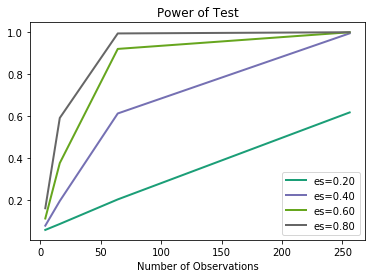

In [9]:
# Renaming just to reuse without a lot of extra typing
sample_sizes = np.array([4**x for x in range(1,5)])
effect_sizes = np.array([0.2*x for x in range(1,5)])

# Making up potential sample/effect sizes that relate to what we observe
#sample_sizes = np.array([n * 0.1, n * 0.5, n, n * 2])
#effect_sizes = np.array([es * 0.1, es * 0.5, es, es * 2])

# Plot the power if we had these sample/effect sizes
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

### Computing Statistical Power

Suppose we are conducting a test where we have:

- Effect size of 0.4
- Sample size of 100
- Significance level of 0.05

What would be the statistical power for this experiment?

In [12]:
analysis.solve_power(effect_size = 0.4, alpha = 0.05, nobs1 = 100  )

0.8036474965430749

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

In [17]:
stat_pows = []

for i in range(1,100):
    stat_pow = analysis.solve_power(effect_size = 0.4, alpha = i/100, nobs1 = 100  )
    stat_pows.append(stat_pow)

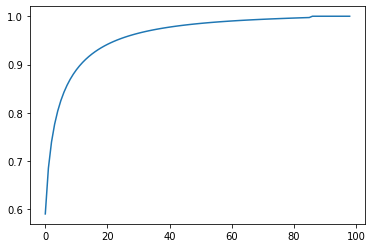

In [18]:
plt.plot(stat_pows)

## Computing Statistical Power for a Real Data Set

Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

### Import the data, and drop rows where `'Age'` is NA.

In [20]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'

In [21]:
titanic = pd.read_csv(data_url)

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
tf = titanic[titanic['Age'].isna() == False]

In [33]:
tf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
tf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

### Summarize the number of observations and average age per group.

In [35]:
survived = tf[tf['Survived']==1]
passed = tf[tf['Survived'] == 0]

In [37]:
print(survived.shape[0])
print(survived['Age'].mean())

290
28.343689655172415


In [ ]:
print(passed.shape[0])
print(passed['Age'].mean())

### Perform t-test.

In [39]:
stats.ttest_ind(survived['Age'], passed['Age'])

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

### Calculate the Effect Size

Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

`effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev`

The pooled standard deviation in the denominator can be derived as follows.

`pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))`

Where `n_obs` is the number of observations and `var` is the variance of each sample.

**Write the code below to calculate the effect size for this test.**

In [40]:
x1 = survived['Age']
x2 = passed['Age']

In [48]:
x1.mean()

28.343689655172415

In [49]:
x2.mean()

30.62617924528302

In [41]:
s_pooled_numerator = (x1.size - 1) * x1.var() + (x2.size - 1) * x2.var()
s_pooled_denominator = x1.size + x2.size - 2

s_pooled = np.sqrt(s_pooled_numerator / s_pooled_denominator)

effect_size = (x1.mean() - x2.mean()) / s_pooled
effect_size

-0.15748597191363298

**Use the effect size you calculated to compute the statistical power of this test.**

In [43]:
analysis.solve_power(effect_size = effect_size, alpha = 0.05, nobs1 = x1.size, ratio = x1.size/x2.size  )

0.39981412790614146

**Determine the effect size we would need to see to get a statistical power of 0.8.**

In [44]:
analysis.solve_power(power = 0.8, alpha = 0.05, nobs1 = x1.size, ratio = x1.size/x2.size  )

0.2586505570883238

**Determine the sample size necessary to get a statistical power of 0.8.**

In [50]:
x1.size

290

In [45]:
analysis.solve_power(effect_size = effect_size, alpha = 0.05, power = 0.8, ratio = x1.size/x2.size  )

780.295838138604

In [53]:
import seaborn as sns

AttributeError: 'str' object has no attribute 'fit'

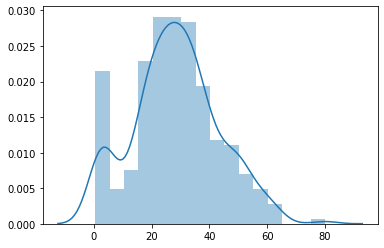

In [56]:
sns.distplot(x1 )

**Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.**

In [46]:
stat_pows = []

for i in range(1,100):
    stat_pow = analysis.solve_power(effect_size = effect_size, alpha = i/100, nobs1 = x1.size, ratio = x1.size/x2.size  )
    stat_pows.append(stat_pow)

In [57]:
analysis.solve_power(effect_size = effect_size, power = 0.8, nobs1 = x1.size, ratio = x1.size/x2.size  )

0.3768070590716193

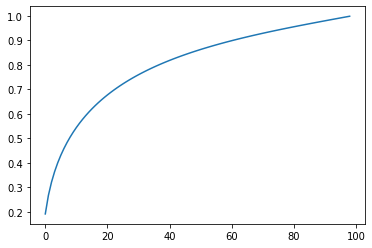

In [47]:
plt.plot(stat_pows)